## CV Keyword Analysis 
I was wondering if my CV lacked any crucial keywords; I decided to use my skills to check if this could be an issue (as well as just asking ChatGPT - such are the times!). 
This micro-project aim was to: 
1. analyze relevant job descriptions to find keywords, common terms, technologies, etc.  
2. see if keywords that describe my skills are missing in my own CV

Tools used: 
1. TF-IDF 
2. Bag of Words 
3. KeyBERT 

Key Insight: Job descriptions for these positions are less hard-skill focused: they mainly describe the contribution made to the team, the project, the business.

Extras: 
1. While I thought I used ChatGPT a lot to make my submissions "nicer-looking", I actually used it about 20% of the time. 
2. The jobs I'm applying for are indeed Data Scientist and Data Analyst positions, but a surprising near 30% of my submissions were for other titles that sounded relevant. Maybe I should focus my efforts on the specific Analyst and Scientist titles?  

#### Step 1: imports and loading the text into a Data Frame 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from docx import Document
from keybert import KeyBERT
from sklearn.feature_extraction.text import TfidfVectorizer

/Users/l/PycharmProjects/cv_keywords/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = "./text"

job_data = {}
structured_fields = ["Position", "Job", "GPT Consult",]
unstructured_fields = ["Job Description"]

for file in os.listdir(dir):
    path = os.path.join(dir, file)
    file = " ".join("".join(file.split(".")[:-1]).split(" ")[:-1]).strip()
    with open(path) as f:
        text = f.read()
        if "Description" in text: 
            job_data[file] = {}
            job_description = []
            description_found = False
            for line in text.splitlines():
                if ":" in line:
                    for field in structured_fields:
                        if field in line:
                            job_data[file][field] = line.split(":")[-1].strip()
                elif "Description" in line:
                    description_found = True
                if description_found:
                    job_description.append(line)
            job_data[file]["Job Description"] = "\n".join(job_description)
                

In [3]:
job_data_df = pd.DataFrame.from_dict(job_data, orient="index")
job_data_df

,Position,Job,GPT Consult,Job Description
StubHub,User Experience Researcher,UX researcher,No,- Job Description\n \n StubHub is on a m...
Elsevier,Research Analyst,//relx.wd3.myworkdayjobs.com/en-US/ElsevierJob...,No,- Job Description\n \n ## About the job\...
Disney,Data Analyst,**,No,- Job Description\n \n **Job ID**\n \...
PEAC,Junior Data Scientist,Data Scientist,No,- Job Description\n \n PEAC Solutions pr...
Validate Health,Data Engineer,Other,No,- Job Description\n \n ## About the job\...
Ralph Lauren,Analytics Analyst,Data Analyst,No,- Job Description\n \n ## About the job\...
Reddit,Data Scientist,Data Scientist,Yes,- Job Description\n \n Reddit is a commu...
Hims & Hers,Data Opportunities,Data Scientist,Yes,- Opportunity Description\n \n Hims & He...
centific,//www.linkedin.com/jobs/view/4062145686/?alter...,Other,No,- Job Description\n \n ## About the job\...
The Farmers Dog,People Analytics Analyst,Data Analyst,No,- Job Description\n \n ## **Who We Are**...


##### isolating the job description (not 100% accurate)  

In [4]:
requirements = ["qualification", "requirement","required", "about you", "looking for", "you bring", "your skills", "your experience",]

def find_req(s):
    requirement_content = ""
    if isinstance(s, str):
        s = str.lower(s)
        for requirement in requirements:
            skip = False
            if requirement in s:
                broken_content = s.split(requirement)
                if (len(broken_content) == 2):
                    if len(broken_content[-1]) > 1000:
                        requirement_content = broken_content[-1]
                        return requirement_content
                    else:
                        skip = True
                elif (len(broken_content) > 1):
                    for i in range(len(broken_content)+1):
                        i = i * (-1)
                        if len(broken_content[i]) > 1000 and len(broken_content[i]) < 5000:
                            requirement_content = broken_content[i]
                            return requirement_content                            
                if not skip:        
                    requirement_content = broken_content
                    return requirement_content
    return requirement_content

In [5]:
job_data_df["Job Requirements"] = job_data_df["Job Description"].apply(find_req)

In [6]:
## ensuring I'm aware of how many items I have in each column 
job_data_df.describe()

,Position,Job,GPT Consult,Job Description,Job Requirements
count,45,46,46,46,46
unique,35,11,2,46,40
top,Data Scientist,Data Scientist,No,- Job Description\n \n StubHub is on a m...,
freq,5,19,37,1,7


#### main reference point: job descriptions and job requirements 

In [7]:
job_data_df[["Job Description", "Job Requirements"]]

,Job Description,Job Requirements
StubHub,- Job Description\n \n StubHub is on a m...,a ticket until they step through the gate. th...
Elsevier,- Job Description\n \n ## About the job\...,s**\n \n - ability to manage client rela...
Disney,- Job Description\n \n **Job ID**\n \...,s**\n \n - a bachelor’s degree or above ...
PEAC,- Job Description\n \n PEAC Solutions pr...,s:**\n \n - bachelor’s degree in mathema...
Validate Health,- Job Description\n \n ## About the job\...,- job description\n \n ## about the job\...
Ralph Lauren,- Job Description\n \n ## About the job\...,"s, break down initiatives into workable increm..."
Reddit,- Job Description\n \n Reddit is a commu...,s:**\n \n - relevant experiences in quan...
Hims & Hers,- Opportunity Description\n \n Hims & He...,
centific,- Job Description\n \n ## About the job\...,s:**\n \n - master’s degree in linguisti...
The Farmers Dog,- Job Description\n \n ## **Who We Are**...,because**\n \n - 2+ years of analytics ...


In [8]:
## selecting the column the analysis will run on: the options are the above columns: "Job Requirements" or "Job Description"
text_data_column = "Job Requirements"

cleaning domain-specific keywords 

note: this list was constructed by filtering out the previously found keywords using KeyBERT and Bag of Words - the ones that were not technical terms I was looking to add. The addition process allowed me to better understand the structure of the job requirements and job descriptions on mass, without actually re-reading all of them. 

In [9]:
domain_specific_stoprwords = (["business", "this", "experience", "new", "role", "benefits", "description", "including", "company", "across", "us", "job", "work", "working", "team", "skills", "product", "science", "analysis", "analyst", "employee", "solution"] + ['teams',
 'research',
 'plans',
 'innovate',
 'mission',
 'planning',
 'strategies',
 'insights',
 'plan',
 'initiatives',
 'efforts',
 'guide',
 'seeking',
 'incorporate',
 'experiences',
 'team',
 'building',
 'life',
 'strategic',
 'achieve',
 'stakeholders',
 'support',
 'marketing',
 'innovation',
 'teamwork',
 'develop',
 'tasks',
 'activities',
 'campaigns',
 'integrates'] + 
                              ['live',
 'events',
 'event',
 'attend',
 'ticket',
 'promoters',
 'build',
 'audience',
 'web',
 'sponsorship',
 'consider',
 'global',
 'audiences',
 'engineers',
 'breakouts',
 'building',
 'stadium',
 'tour',
 'expertise',
 'advertiser',
 'communicate',
 'journey',
 'decisions',
 'worldwide',
 'vibrant',
 'engage',
 'monetize',
 'meetings',
 'roadmap',
 'communicating',
 'make',
 'customers',
 'marketplace'] +

                        ['user',
 'buyers',
 'marketers',
 'designers',
 'prospective',
 'customer',
 'making',
 'bring',
 'consumers',
 'needs',
 'researcher',
 'consumer',
 'cx',
 'advertising',
 'merchandising',
 'users',
 'exploring',
 'fostering',
 'engineering',
 'competitors',
 'clients',
 'marketing',
 'team',
 'products',
 'engineers',
 'anticipate',
 'want',
 'engagement',
 'interact',
 'brand',
 'seeks',
 'feedback',
 'strategy',
 'behavioral',
 'meet']                           
                         +
                              ['fans',
 'platform',
 'looking',
 'join',
 'passionate',
 'selling',
 'team',
 'mindset',
 'innovative',
 'inclusive',
 'usability',
 'researchprojects',
 'offers',
 'competitive',
 'deliver',
 'purpose',
 'group',
 'marketing',
 'platforms',
 'critical',
 'browse',
 'design',
 'compelling',
 'driven',
 'providing',
 'partnerships',
 'conduct',
 'innovating',
 'successful',
 'reach',
 'crowd',
 'sourcing',
 'building',
 'innovators',
 'dreamers',
 'delivering']
                        +
                              ['action',
 'opportunities',
 'developing',
 'campaign',
 'thoughtfully',
 'professionals',
 'advance',
 'understand',
 'leadership',
 'storytelling',
 'participate',
 'objectives',
 'partner',
 'educate',
 'leveraging',
 'initiative',
 'retail',
 'resource',
 'transforming',
 'organizations',
 'embracing',
 'challenges',
 'encourage',
 'shifting',
 'priorities',
 'ideas',
 'assess',
 'outcomes',
 'collaborate',
 'met',
 'thrive',
 'collaboration',
 'improve',
 'immediately',
 'participation',
 'implement',
 'embraces',
 'opportunity',
 'create',
 'impactful', 
                               'health']
+
['provide',
 'guidance',
 'play',
 'consultation',
 'bringing',
 'characters',
 'actively',
 'recruiting',
 'concepts',
 'generation',
 'responsibilities',
 'analyzing',
 'meaningful',
 'narratives',
 'team',
 'building',
 'focus',
 'learn',
 'driven',
 'stories',
 'partnership',
 'communication',
 'facilitate',
 'setup',
 'enriching',
 'collegial',
 'services',
 'practices',
 'promoting',
 'timely',
 'presentation',
 'serve',
 'craft',
 'receive',
 'engaging',
 'vendors',
 'understanding',
 'advocate',
 'prioritization',
 'tactics',
 'ensuring'] +
['insightful',
 'requirements',
 'clear',
 'narrative',
 'reimagining',
 'aspect',
 'optimized',
 'fulfilling',
 'lives',
 'role',
 'expanding',
 'team',
 'building',
 'mission',
 'driven',
 'verbal',
 'recruitment',
 'conversion',
 'goals',
 'management',
 'outlining',
 'involved',
 'phases',
 'restlessly',
 'reinventing',
 'ensure',
 'success',
 'roles',
 'based',
 'approaches',
 'facing',
 'conceptualize',
 'tasked',
 'activating',
 'act',
 'consultant',
 'help',
 'organization',
 'conceptualization',
 'goal',
 'hiring']
                   +
                              ['insightful',
 'requirements',
 'clear',
 'narrative',
 'reimagining',
 'aspect',
 'optimized',
 'fulfilling',
 'lives',
 'role',
 'expanding',
 'team',
 'building',
 'mission',
 'driven',
 'verbal',
 'recruitment',
 'conversion',
 'goals',
 'management',
 'outlining',
 'involved',
 'phases',
 'restlessly',
 'reinventing',
 'ensure',
 'success',
 'roles',
 'based',
 'approaches',
 'facing',
 'conceptualize',
 'tasked',
 'activating',
 'act',
 'consultant',
 'help',
 'organization',
 'conceptualization',
 'goal',
 'hiring']
+
['notion',
 'toolmaking',
 'driving',
 'enterprise',
 'delivery',
 'capabilities',
 'tactical',
 'productand',
 'creating',
 'managing',
 'operations',
 'partnering',
 'business',
 'critical',
 'team',
 'building',
 'interoperability',
 'industry',
 'deploy',
 'staff',
 'creation',
 'deployments',
 'preprocessing',
 'evaluation',
 'changing',
 'operational',
 'interview',
 'functional',
 'stakeholder',
 'manage',
 'way',
 'mission',
 'driven',
 'operate',
 'making',
 'concerns',
 'suggestions',
 'endeavor',
 'actionable',
 'production',
 'manages',
 'diverse',
 'deploying'] + 
["range", "solutions", "compensation", "ability", "paid", "salary", "environment", "problems"]+
["employees", "status", "may", "people", "process"] +
['members',
 'concise',
 'making',
 'customer',
 'sales',
 'integrated',
 'write',
 'effectively',
 'user',
 'role',
 'project',
 'business',
 'critical',
 'expand',
 'professional',
 'office',
 'guidelines',
 'informed',
 'joining',
 'culture',
 'meets',
 'inquiries',
 'concerning',
 'challenging',
 'collaborative',
 'team',
 'building',
 'organize',
 'consulting',
 'best',
 'clients',
 'meeting',
 'methodologies',
 'leading',
 'colleagues',
 'world',
 'overview',
 'engaged',
 'value',
 'proposal',
 'engagements',
 'broad']
+ 
["care", "plus", "strong", "disability"]
                              + [i.lower() for i in list(job_data_df.index)])

#### using Bag of Words (unigrams) to look at the most frequent terms in the text

While Bag if Words is a very naive method, this step also includes preparation of data that would be useful when using KeyBERT and TF-IDF later; not including a BoW analysis seemed like a waste. 

In [10]:
bow = {}
all_descriptions_string = ""
tfidf_training = []
for job in job_data_df[text_data_column]:
    job_description_clean = ""
    for word in job.split():
        word = word.lower()
        word = "".join([c if c not in string.punctuation else " " for c in word ]).strip()
        # stemmer = PorterStemmer()
        # word = stemmer.stem(word)
        if word not in domain_specific_stoprwords and word != "":
           all_descriptions_string = all_descriptions_string + word + " "
           job_description_clean = job_description_clean + word + " "
           if word not in stopwords.words('english'):
               if word in bow:
                   bow[word] += 1
               else:
                   bow[word] = 1
    tfidf_training.append(job_description_clean)

In [11]:
bow_df = pd.DataFrame.from_dict(bow, orient="index")
bow_df.reset_index(inplace=True)
bow_df.columns = ["word", "count"]
bow_df = bow_df[bow_df["count"] > 1]
bow_df.sort_values(["count"] ,ascending=False, inplace=True)

In [12]:
bow_df

,word,count
180,data,201
285,learning,42
713,ai,33
332,tools,26
115,time,26
...,...,...
786,rooted,2
785,company’s,2
774,friday,2
771,dogs,2


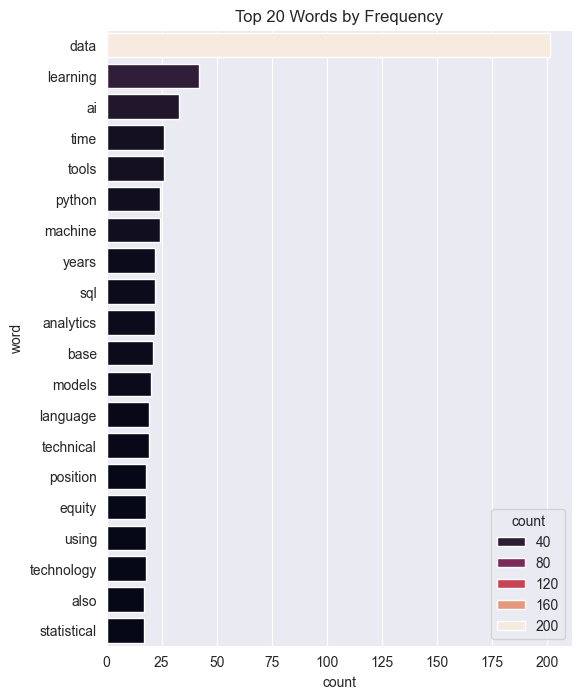

In [13]:
top_words = bow_df.sort_values(["count"] ,ascending=False)[:20]
plt.figure(figsize=(6, 8))
sns.barplot(x = "count", y = "word", data = top_words, orient="h", palette="rocket", hue="count")
plt.title("Top 20 Words by Frequency")
plt.show()

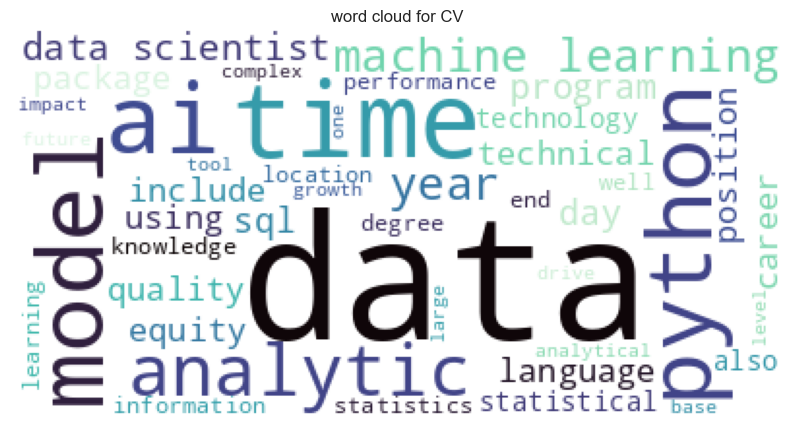

In [14]:
wc = WordCloud(max_words=500, 
               stopwords=stopwords.words('english'),
               max_font_size=90,
               min_font_size=8,
               colormap="mako",
               background_color="white",
               ).generate(all_descriptions_string)
plt.figure(figsize=(10, 12))
plt.imshow(wc)
plt.axis('off')
plt.title("word cloud for CV")
plt.show()

using BERT to find domain-specific stopwords

In [15]:
kw_model = KeyBERT()

keywords = kw_model.extract_keywords(all_descriptions_string, keyphrase_ngram_range=(1, 2), top_n=25)

kw_df = pd.DataFrame(keywords)
kw_df

,0,1
0,team building,0.4048
1,automate,0.3779
2,clients,0.3720
3,escalation requests,0.3526
4,client executives,0.3509
5,ventures service,0.3504
6,maintaining automated,0.3487
7,facilitating,0.3484
8,automation,0.3444
9,client evaluating,0.3437


In [16]:
domain_specific_stoprwords = [] 
for i in kw_df[0]:
    for word in i.split(): 
        if word not in domain_specific_stoprwords:
            domain_specific_stoprwords.append(word)
domain_specific_stoprwords

['team',
 'building',
 'automate',
 'clients',
 'escalation',
 'requests',
 'client',
 'executives',
 'ventures',
 'service',
 'maintaining',
 'automated',
 'facilitating',
 'automation',
 'evaluating',
 'automating',
 'appropriate',
 'collaboratively',
 'ideating',
 'improving',
 'collaborating',
 'analyses',
 'organisation',
 'agile',
 'data',
 'organizational',
 'enterprise',
 'ready',
 'helping',
 'entrepreneurs',
 'logistics',
 'translate',
 'teams',
 'risks',
 'role',
 'response']

using tf-idf to look at the job description as they are 

In [17]:
docs = job_data_df[text_data_column]
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
job_kw_tfidf_matrix = vectorizer.fit_transform(docs)
job_tfidf = pd.DataFrame(job_kw_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

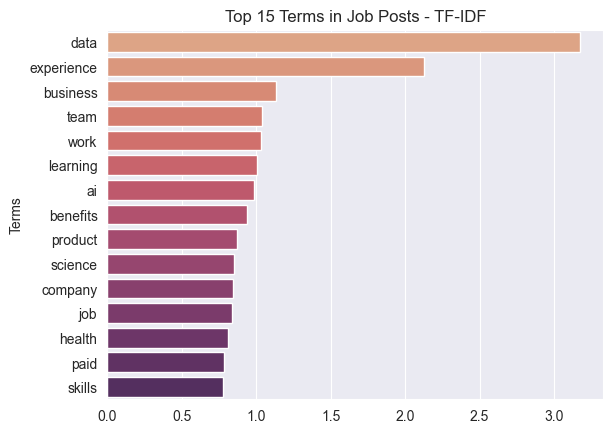

In [18]:
job_totals = job_tfidf.sum(axis=0).sort_values(ascending=False)
top_15 = job_totals.head(15)
sns.barplot(x=top_15.values,  y=top_15.index, hue=top_15.index,  legend=False, palette='flare')
plt.ylabel('Terms')
plt.title('Top 15 Terms in Job Posts - TF-IDF')
plt.show()

using tf-idf to look at the job description when its clean of domain-specific stopwords

In [19]:
docs = tfidf_training
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
job_kw_tfidf_matrix = vectorizer.fit_transform(docs)
job_tfidf = pd.DataFrame(job_kw_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

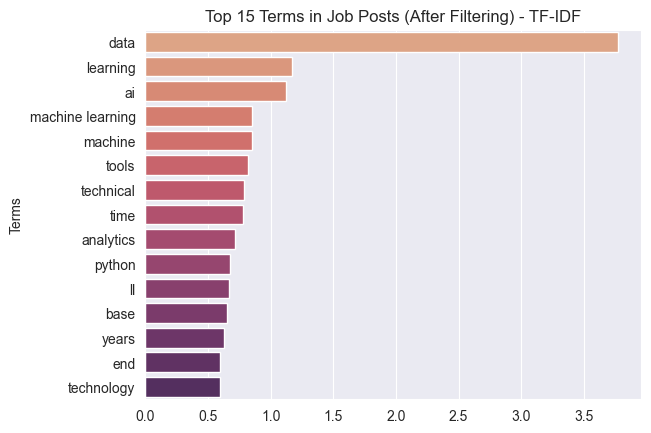

In [20]:
job_totals = job_tfidf.sum(axis=0).sort_values(ascending=False)
top_15 = job_totals.head(15)
sns.barplot(x=top_15.values,  y=top_15.index, hue=top_15.index,  legend=False, palette='flare')
plt.ylabel('Terms')
plt.title('Top 15 Terms in Job Posts (After Filtering) - TF-IDF')
plt.show()

In [21]:
file = Document("CV 2025.docx")
content = "\n".join([para.text for para in file.paragraphs])
content = content.lower()
words_to_add = []
for word in top_words["word"]: 
    if word not in content:
        print(f"include {word} in your CV!")
        words_to_add.append(word)

include language in your CV!
include equity in your CV!
include technology in your CV!
include also in your CV!


### Extra: How Often do I use ChatGPT? 

should I use it more often to improve how my cover letters sound? should I use it less often, to maintain authenticity? 
looks like I'm not a fan of using it. 

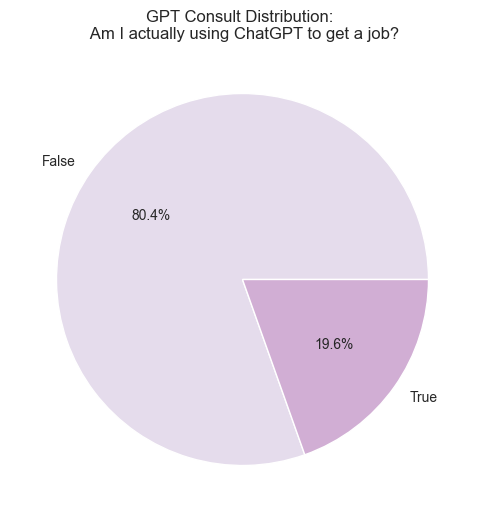

In [24]:
job_data_df["GPT Consult"] = job_data_df["GPT Consult"].apply(lambda x: x == "Yes")
plt.figure(figsize=(6, 8))
gpt_counts = job_data_df["GPT Consult"].value_counts()
plt.pie(gpt_counts, labels=gpt_counts.index, colors=sns.color_palette("PuRd"), autopct=f"%1.1f%%")
plt.title("GPT Consult Distribution: \n Am I actually using ChatGPT to get a job?")
plt.show()

### Extra: What Position am I Looking For? 

In [25]:
job_counts = job_data_df["Job"].value_counts()

other_titles = job_counts[job_counts <= 5]
other_titles_sum = other_titles.sum()
job_counts.drop(other_titles.index, inplace=True)
job_counts_df = pd.DataFrame(job_counts)
job_counts_df.loc["Other", "count"] = other_titles_sum
job_counts_df["count"] = job_counts_df["count"].astype(int)
job_counts_df

,count
Job,
Data Scientist,19
Data Analyst,14
Other,13


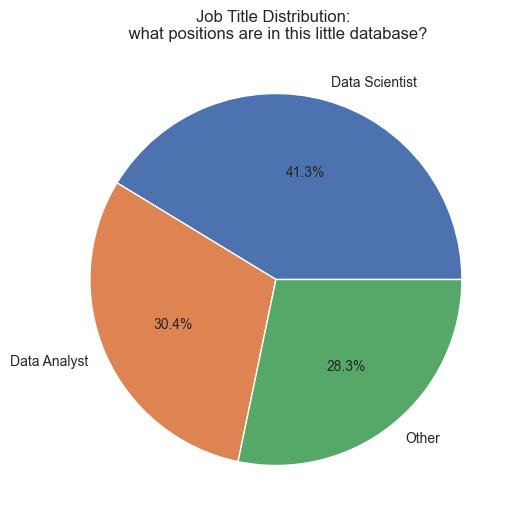

In [26]:
plt.figure(figsize=(6, 8))
plt.pie(job_counts_df["count"], labels=job_counts_df.index, colors=sns.color_palette("deep"), autopct=f"%1.1f%%")
plt.title("Job Title Distribution: \n what positions are in this little database?")
plt.show()